### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc

### Load Dataset

In [3]:
df_reactions = pd.read_csv('/Users/alanwortman/Desktop/Grad School/Stephenson/Droplet Microfluidics/Slides/HTE Reactions in Process Chemistry.csv')
df_reactions.head()

,Reaction Type,Amgen,AstraZeneca,BMS,GSK,Merck,Pfizer,Lilly,Upenn,Avg (Industry),Total (Industry)
0,Biocatalysis,19,14,20,24,22,14,19,0,18.9,132
1,Suzuki-Miyaura,23,9,9,11,3,7,16,27,11.1,78
2,Buchwald-Hartwig,13,6,7,6,5,3,19,16,8.4,59
3,Chiral Salt Resolution,19,4,7,0,3,6,12,0,7.3,51
4,Heterogeneous Catalysis,0,0,8,12,2,21,0,0,6.1,43


### Prepare Dataset

In [4]:
df_reactions_descending = df_reactions.sort_values('Total (Industry)', ascending = True).reset_index()
df_UPenn = df_reactions.sort_values('Upenn', ascending = True).reset_index()

y_range = range(0, len(df_reactions_descending['Reaction Type']))


### Colors

In [5]:
GREY94 = '#f0f0f0'
GREY75 = '#bfbfbf'
GREY65 = '#a6a6a6'
Grey55 = '#8c8c8c'
GREY50 = '#7f7f7f'
GREY40 = '#666666'
Light_blue = '#b4d1d2'
Dark_blue = '#242c3c'
Blue = '#4a5a7b'
White = '#FFFCFC'
BG_White = '#fafaf5'
Magenta = '#c36b95'
Scarlet = '#f95335'

### Build Chart

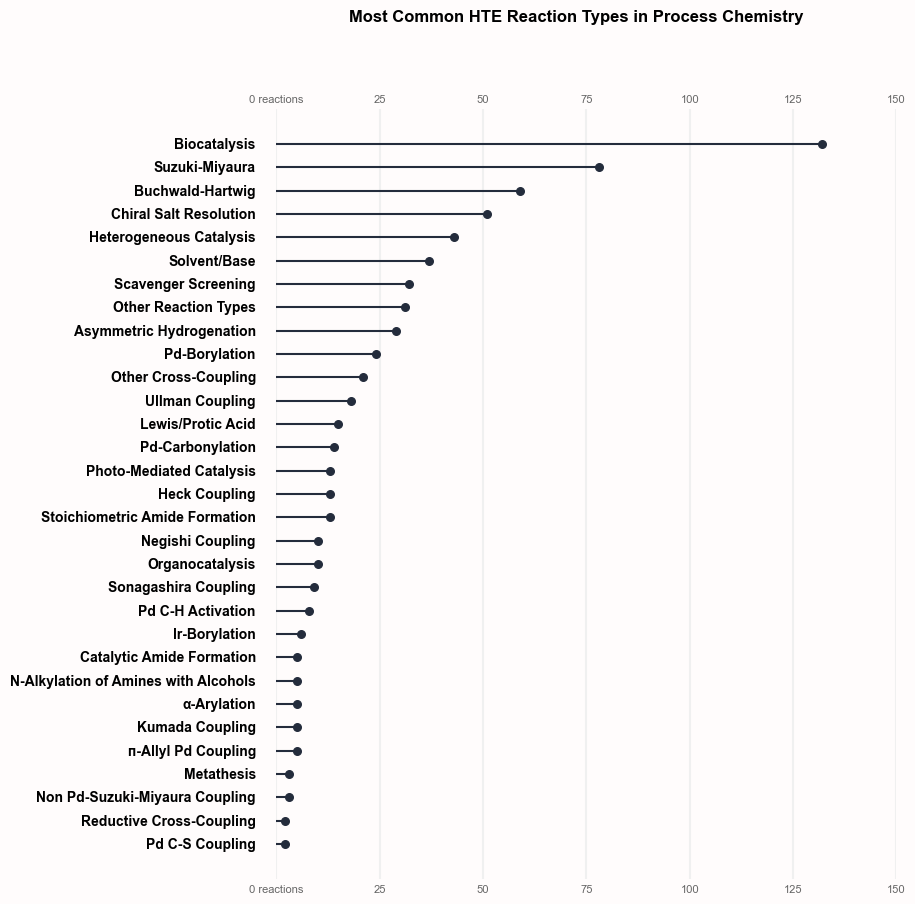

In [624]:
fig, ax = plt.subplots(figsize = (8,10))

#Add segment

ax.hlines(data = df_reactions_descending, 
          xmin = 0, 
          xmax = df_reactions_descending['Total (Industry)'], 
          y = y_range, 
          color = Dark_blue,
         ls = 'solid')

#Add dots
ax.scatter(data = df_reactions_descending, 
           x = df_reactions_descending['Total (Industry)'], 
           y = y_range, color = Dark_blue, 
           s = 30, 
           zorder = 2)

#Annotations
for i in df_reactions_descending.index:
    ax.text(
        x = -5, 
        y = i, 
        s = str(df_reactions_descending['Reaction Type'][i]), 
        ha = 'right',
        va = 'center',
        size = 10,
        color = 'k',
        fontname = 'Arial',
        weight = 'bold')
    
#Customize Layout
#Hide Spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Hide y labels
ax.yaxis.set_visible(False)

#Customize X Ticks
ax.tick_params(axis = 'x', 
               bottom = True, 
               top = True, 
               labelbottom = True, 
               labeltop = True, 
               length = 0)
x_ticks = np.linspace(0,150, num = 7, dtype = int).tolist()
ax.set_xlim(0, 150)
ax.set_xticks(x_ticks)
ax.set_xticklabels(['0 reactions'] + x_ticks[1:], 
                   size = 8,
                  color = GREY40,
                  fontname = 'Arial')

#Add vertical lines, zorder = 0 important so they stay behind the horozontal lines
for tick in x_ticks:
    ax.axvline(tick, color = GREY94, zorder = 0)

#Set Background Color
ax.set_facecolor(White)

#Add vertical space to the vertical limit in the plot
x0, x1, y0, y1 = plt.axis()
plt.axis((x0, x1, y0, y1))

#Add Title
plt.suptitle(
    'Most Common HTE Reaction Types in Process Chemistry',
    weight = 'bold',
    fontname = 'Arial')

#Set figure background color, match to subplot background
fig.patch.set_facecolor(White)

### Trying to figure out how to color just a single line  

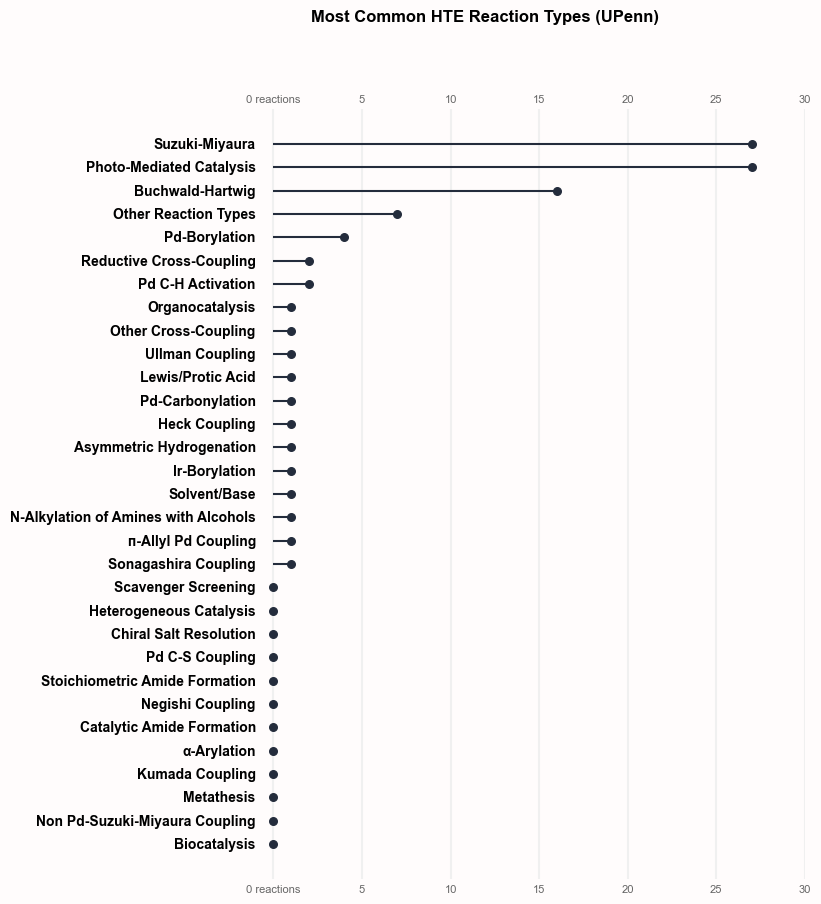

In [633]:
fig, ax = plt.subplots(figsize = (8,10))

#Add segment

ax.hlines(data = df_UPenn, 
          xmin = 0, 
          xmax = df_UPenn['Upenn'], 
          y = y_range, 
          color = Dark_blue,
         ls = 'solid')

#Add dots
ax.scatter(data = df_UPenn, 
           x = df_UPenn['Upenn'], 
           y = y_range, color = Dark_blue, 
           s = 30, 
           zorder = 2)

#Annotations
for i in df_reactions_descending.index:
    ax.text(
        x = -1, 
        y = i, 
        s = str(df_UPenn['Reaction Type'][i]), 
        ha = 'right',
        va = 'center',
        size = 10,
        color = 'k',
        fontname = 'Arial',
        weight = 'bold')
    
#Customize Layout
#Hide Spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Hide y labels
ax.yaxis.set_visible(False)

#Customize X Ticks
ax.tick_params(axis = 'x', 
               bottom = True, 
               top = True, 
               labelbottom = True, 
               labeltop = True, 
               length = 0)
x_ticks = np.linspace(0,30, num = 7, dtype = int).tolist()
ax.set_xlim(-5, 30)
ax.set_xticks(x_ticks)
ax.set_xticklabels(['0 reactions'] + x_ticks[1:], 
                   size = 8,
                  color = GREY40,
                  fontname = 'Arial')

#Add vertical lines, zorder = 0 important so they stay behind the horozontal lines
for tick in x_ticks:
    ax.axvline(tick, color = GREY94, zorder = 0)

#Set Background Color
ax.set_facecolor(White)

#Add vertical space to the vertical limit in the plot
x0, x1, y0, y1 = plt.axis()
plt.axis((x0, x1, y0, y1))

#Add Title
plt.suptitle(
    'Most Common HTE Reaction Types (UPenn)',
    weight = 'bold',
    fontname = 'Arial')

#Set figure background color, match to subplot background
fig.patch.set_facecolor(White)

### Reaction Info Function

In [415]:
# def get_reaction_info(reaction):
#     for i in df_reactions_descending.index:
#         if str(df_reactions_descending['Reaction Type'][i]) == reaction:
#             return df_reactions_descending['Total (Industry)'][i], i
            
# reaction_info = get_reaction_info('Biocatalysis')

# # #set y = i in h-lines?

### Color Bar Function

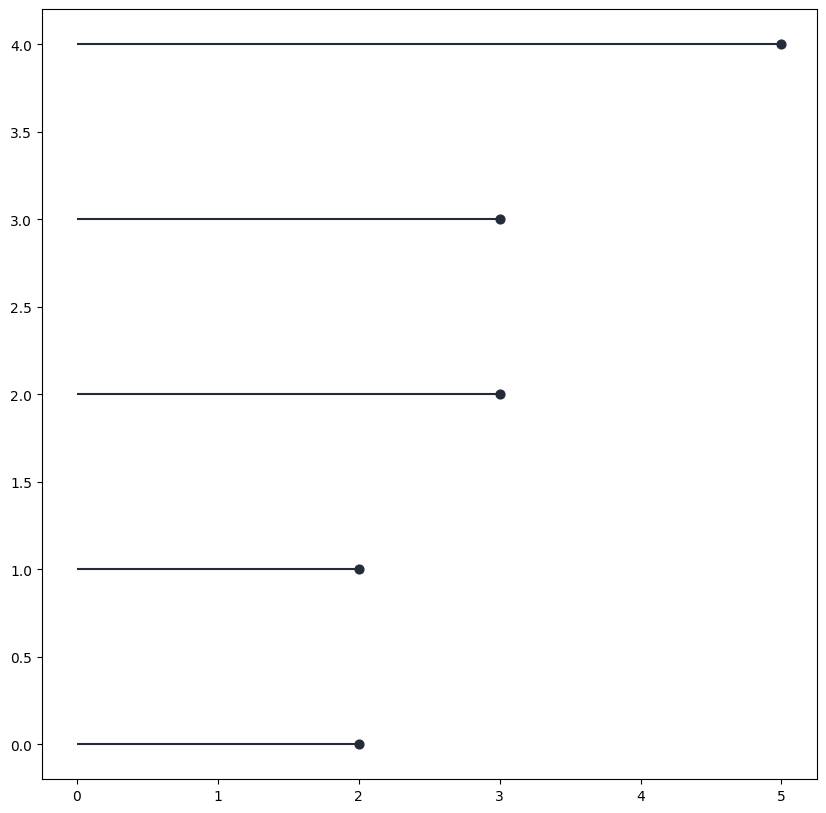

In [567]:
fig, ax = plt.subplots(figsize = (10,10))

#Want to get reaction info and plug that into a plot all within the same function
def color_bar(reaction):
    def get_reaction_info(reaction):
        for i in df_reactions_descending.index:
            if df_reactions_descending['Reaction Type'][i] == reaction:
                return df_reactions_descending['Total (Industry)'][i], i
    
    ax.hlines(data = df_reactions_descending, 
        xmin = 0, 
        xmax = get_reaction_info(reaction)[0], 
        y = get_reaction_info(reaction)[1], 
        color = Dark_blue,
        ls = 'solid',
        zorder = 3)
    
    ax.scatter(data = df_reactions_descending, 
           x = get_reaction_info(reaction)[0], 
           y = get_reaction_info(reaction)[1], 
           color = Dark_blue, 
           s = 40, 
           zorder = 3) 
            

reactions = df_reactions_descending['Reaction Type'][:5].tolist()

for reaction in reactions:
    color_bar(reaction)



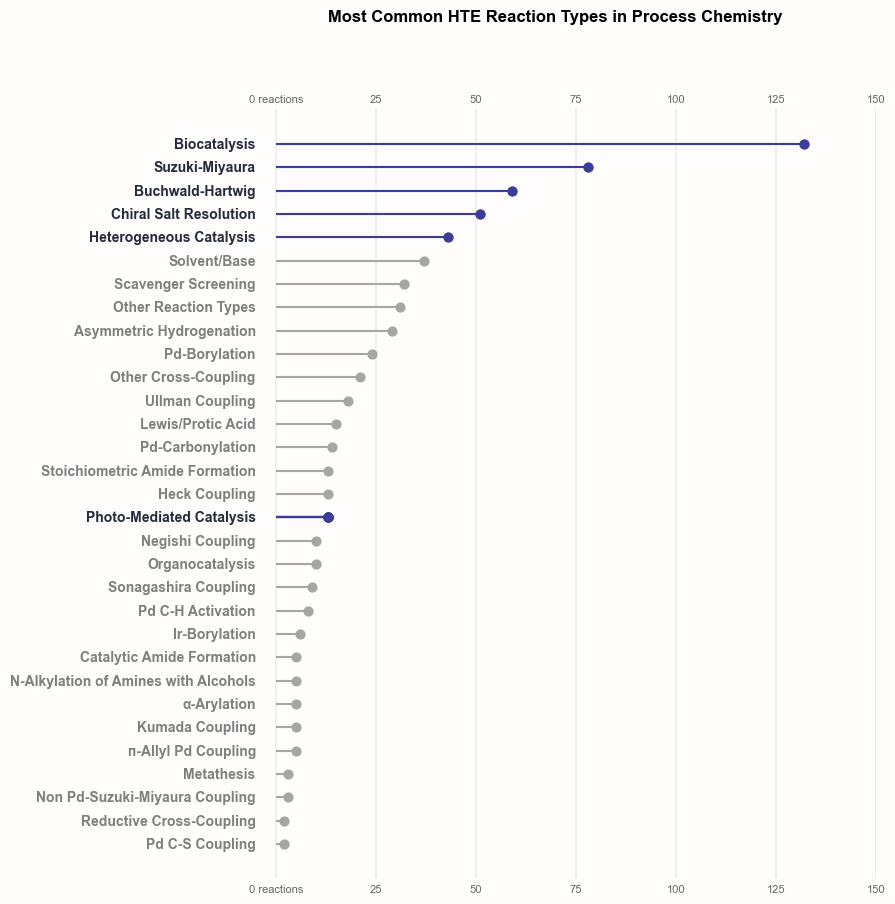

In [10]:
fig, ax = plt.subplots(figsize = (8,10))


# Make a function that will plot a the highlighted form of a reaction. Pay close attention to the zorder!!
'''This function finds the # of reactions and index of the 
specified reaction and plots over the following 
ax.hlines to highlight the reaction of interest
'''

def color_bar(reaction):
    def get_reaction_info(reaction):
        for i in df_reactions_descending.index:
            if str(df_reactions_descending['Reaction Type'][i]) == reaction:
                return df_reactions_descending['Total (Industry)'][i], i
    
    ax.hlines(data = df_reactions_descending, 
        xmin = 0, 
        xmax = get_reaction_info(reaction)[0], 
        y = get_reaction_info(reaction)[1], 
        color = '#3a3e98',
        ls = 'solid',
        zorder = 3)
    
    ax.scatter(data = df_reactions_descending, 
           x = get_reaction_info(reaction)[0], 
           y = get_reaction_info(reaction)[1], 
           color = '#3a3e98', 
           s = 40, 
           zorder = 3)

#Creates a list of the first x reactions and iterates through it with the color_bar function
reactions = df_reactions_descending['Reaction Type'][-5:].tolist()

for reaction in reactions:
    color_bar(reaction)
    color_bar('Photo-Mediated Catalysis')

#Add segment
for i in df_reactions_descending.index:
    ax.hlines(data = df_reactions_descending, 
          xmin = 0, 
          xmax = df_reactions_descending['Total (Industry)'][i], 
          y = i, 
          color = GREY65,
         ls = 'solid')

#Add dots
for i in df_reactions_descending.index:
    ax.scatter(data = df_reactions_descending, 
           x = df_reactions_descending['Total (Industry)'][i], 
           y = i, 
           color = GREY65, 
           s = 40, 
           zorder = 2)

#Annotations for the reactions you want to highlight (specify by index)
for i in df_reactions_descending.index[-5:]:
    ax.text(
        x = -5, 
        y = i, 
        s = str(df_reactions_descending['Reaction Type'][i]), 
        ha = 'right',
        va = 'center',
        size = 10,
        color = Dark_blue,
        fontname = 'Arial',
        weight = 'bold')
    
#Annotations for grey reactions
for i in df_reactions_descending.index[:-5]:
    if df_reactions_descending['Reaction Type'][i] == 'Photo-Mediated Catalysis':
        ax.text(
            x = -5, 
            y = i, 
            s = str(df_reactions_descending['Reaction Type'][i]), 
            ha = 'right',
            va = 'center',
            size = 10,
            color = Dark_blue,
            fontname = 'Arial',
            weight = 'bold')
    else:
        ax.text(
            x = -5, 
            y = i, 
            s = str(df_reactions_descending['Reaction Type'][i]), 
            ha = 'right',
            va = 'center',
            size = 10,
            color = GREY50,
            fontname = 'Arial',
            weight = 'bold')
#Customize Layout
#Hide Spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Hide y labels
ax.yaxis.set_visible(False)

#Customize X Ticks
ax.tick_params(axis = 'x', 
               bottom = True, 
               top = True, 
               labelbottom = True, 
               labeltop = True, 
               length = 0)
x_ticks = np.linspace(0,150, num = 7, dtype = int).tolist()
ax.set_xlim(-5, 150)
ax.set_xticks(x_ticks)
ax.set_xticklabels(['0 reactions'] + x_ticks[1:], 
                   size = 8,
                  color = GREY40,
                  fontname = 'Arial')

#Add vertical lines, zorder = 0 important so they stay behind the horozontal lines
for tick in x_ticks:
    ax.axvline(tick, color = GREY94, zorder = 0)
    
#Set Background Color
ax.set_facecolor(White)

#Add vertical space to the vertical limit in the plot
# x0, x1, y0, y1 = plt.axis()
# plt.axis((x0, x1, y0, y1))


#Add Title
plt.suptitle(
    'Most Common HTE Reaction Types in Process Chemistry',
    weight = 'bold',
    fontname = 'Arial')

#Set figure background color, match to subplot background
fig.patch.set_facecolor(White)

plt.savefig(fname = 'Common HTE Reactions Plot1.png', dpi = 300, bbox_inches = 'tight')